<a href="https://colab.research.google.com/github/Yutthana-BJ/Project_YB/blob/main/ML_Forecasting_Web_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Input Data
Download the data set from https://www.kaggle.com/datasets/bobnau/daily-website-visitors?resource=download

Then that, save the downloaded data in `Google Drive`.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data_set = '/content/drive/MyDrive/Colab Notebooks/DataSet/Daily_Website_Visitors.csv'
df = pd.read_csv(data_set)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


# 2. Data Preparation

In [132]:
metrics = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
df[metrics] = df[metrics].replace(',', '', regex=True)
df[metrics] = df[metrics].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   int64 
 5   Unique.Visits      2167 non-null   int64 
 6   First.Time.Visits  2167 non-null   int64 
 7   Returning.Visits   2167 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 135.6+ KB


In [133]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(['Row', 'Day', 'Day.Of.Week'],axis=1)
df

,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,2014-09-14,2146,1582,1430,152
1,2014-09-15,3621,2528,2297,231
2,2014-09-16,3698,2630,2352,278
3,2014-09-17,3667,2614,2327,287
4,2014-09-18,3316,2366,2130,236
...,...,...,...,...,...
2162,2020-08-15,2221,1696,1373,323
2163,2020-08-16,2724,2037,1686,351
2164,2020-08-17,3456,2638,2181,457
2165,2020-08-18,3581,2683,2184,499


In [134]:
monthly = df.set_index('Date')
df_monthly = monthly.resample('M').mean().round(2)
df_monthly

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,
2014-09-30,3297.18,2326.12,2090.71,235.41
2014-10-31,3934.94,2760.29,2436.65,323.65
2014-11-30,3806.33,2717.10,2353.03,364.07
2014-12-31,3407.00,2451.77,2086.35,365.42
2015-01-31,3099.26,2156.87,1839.03,317.84
...,...,...,...,...
2020-04-30,5048.07,3916.00,3349.27,566.73
2020-05-31,5032.94,3903.77,3304.00,599.77
2020-06-30,4156.10,3190.53,2690.13,500.40


# 3. Data Analysis

## 3.1 Basic Statistic

In [135]:
df_monthly[metrics].describe().round(2)

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,72.00,72.00,72.00,72.00
mean,4111.57,2940.29,2430.37,509.92
std,794.02,579.73,501.12,104.79
min,2350.13,1645.03,1266.48,235.41
25%,3434.38,2449.16,2046.80,431.66
50%,4052.74,2939.94,2403.24,503.76
75%,4719.75,3352.22,2829.84,588.50
max,5852.40,3964.60,3349.27,747.53


## 3.2 Test the Outlier of Metrics

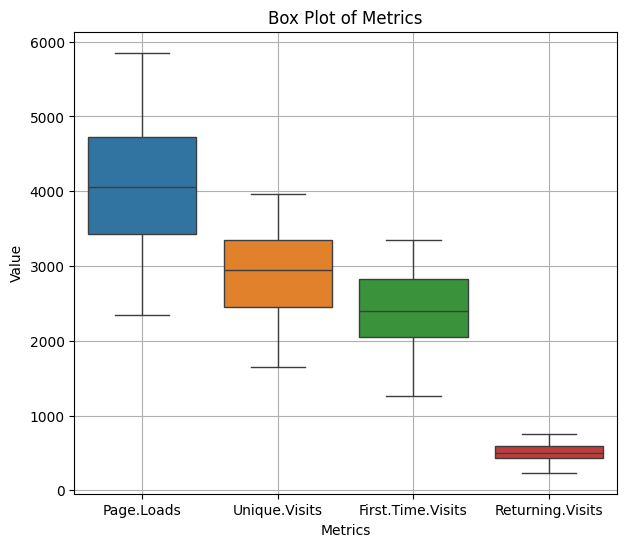

In [136]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=df_monthly[metrics])
plt.title('Box Plot of Metrics')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.grid(True)
plt.show()

## 3.3 Stationary

ADF Statistic: -3.1658958673084694
p-value: 0.022045592980499455
Stationary


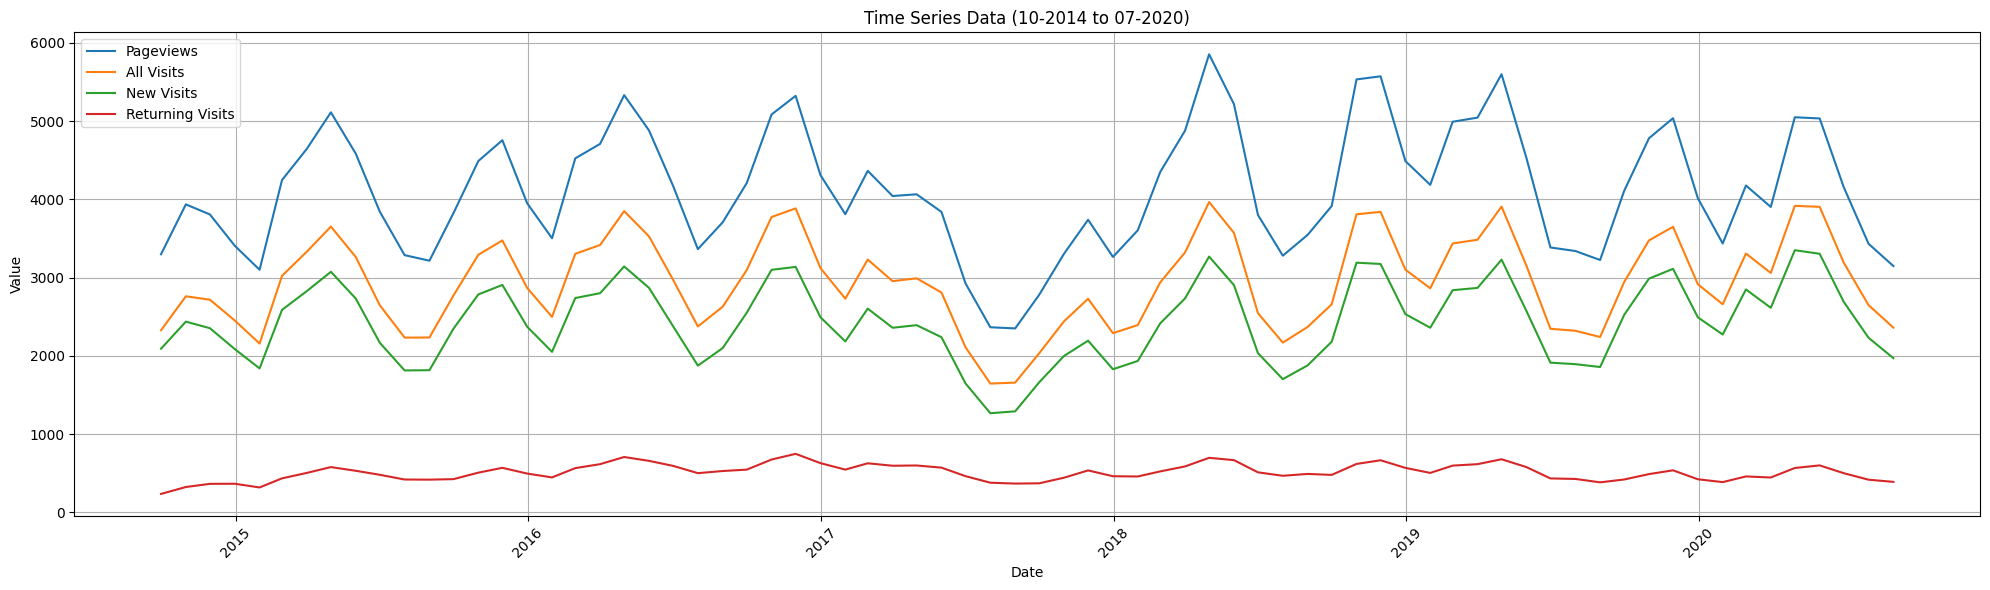

In [185]:
# Perform the Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')

check_stationarity(df_monthly['Page.Loads'])


plt.figure(figsize=(20, 6))
plt.plot(df_monthly['Page.Loads'], label='Pageviews')
plt.plot(df_monthly['Unique.Visits'], label='All Visits')
plt.plot(df_monthly['First.Time.Visits'], label='New Visits')
plt.plot(df_monthly['Returning.Visits'], label='Returning Visits')

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.title('Time Series Data (10-2014 to 07-2020)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Data Modeling

## 4.1 Create Training Dataset & Test Dataset

In [139]:
test_size = 0.28
n_test = int(len(df_monthly) * test_size)

train_set = df_monthly[:-n_test]
train_set = train_set[['Page.Loads']]
test_set = df_monthly[-n_test:]
test_set = test_set[['Page.Loads']]

## 4.2 Training & Test Model - Seasonal ARIMA (SARIMA)

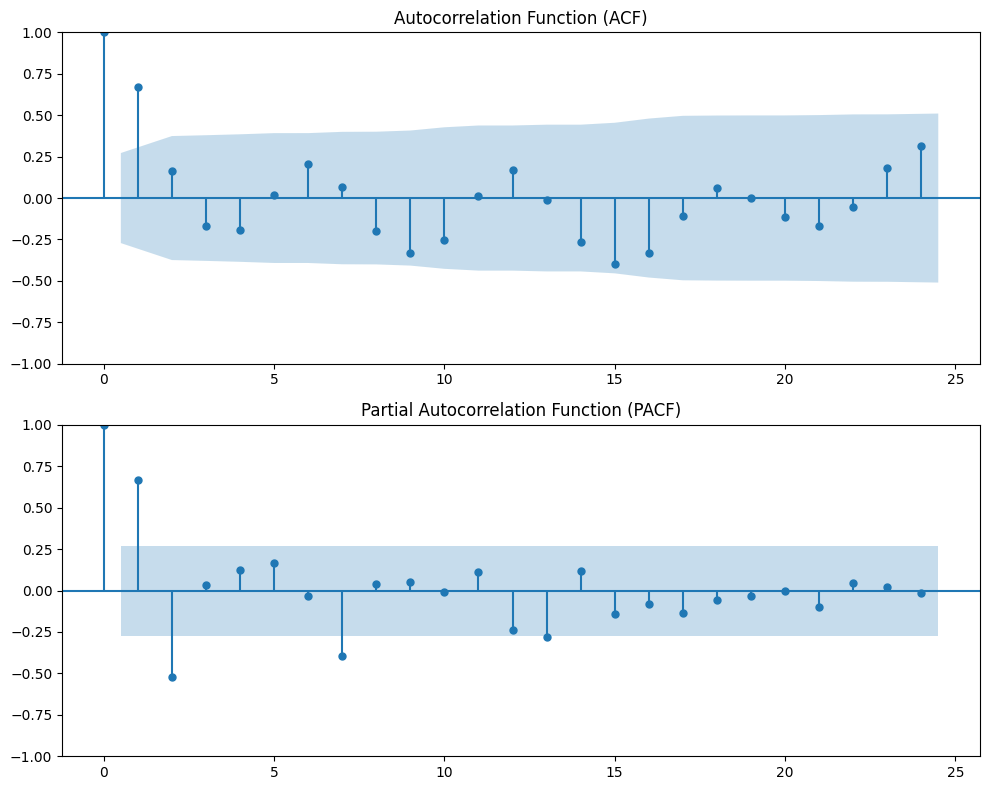

In [140]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from sklearn.metrics import mean_absolute_percentage_error

# Plot ACF & PACF
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot ACF
plot_acf(train_set, lags=24, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(train_set, lags=24, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [181]:
import itertools
p = [1, 2, 3]
d = [0]
q = [1, 2]
P = [0, 1]
D = [0]
Q = [0, 1]
s = [12]

parameters = list(itertools.product(p, d, q, P, D, Q, s))
Order = []
Seasonal_Order = []
AIC = []
BIC = []

for param in parameters:
    try:
        model = SARIMAX(train_set, order=(param[0], param[1], param[2]),  seasonal_order=(param[3], param[4], param[5], param[6]))
        model_fit = model.fit()
        order = f'({param[0]}, {param[1]}, {param[2]})'
        Order.append(order)
        seasonal_order = f'({param[3]}, {param[4]}, {param[5]}, {param[6]})'
        Seasonal_Order.append(seasonal_order)
        aic = f'{model_fit.aic.round(2)}'
        AIC.append(aic)
        bic = f'{model_fit.bic.round(2)}'
        BIC.append(bic)
    except:
        continue

data = data = {'Order': Order, 'Seasonal_Order': Seasonal_Order, 'AIC': AIC, 'BIC': BIC}
df_parameter = pd.DataFrame(data)
df_parameter

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace

,Order,Seasonal_Order,AIC,BIC
0,"(1, 0, 1)","(0, 0, 0, 12)",822.46,828.32
1,"(1, 0, 1)","(0, 0, 1, 12)",887.73,895.54
2,"(1, 0, 1)","(1, 0, 0, 12)",791.8,799.61
3,"(1, 0, 1)","(1, 0, 1, 12)",784.64,794.4
4,"(1, 0, 2)","(0, 0, 0, 12)",823.62,831.42
5,"(1, 0, 2)","(0, 0, 1, 12)",889.66,899.42
6,"(1, 0, 2)","(1, 0, 0, 12)",793.47,803.22
7,"(1, 0, 2)","(1, 0, 1, 12)",786.66,798.36
8,"(2, 0, 1)","(0, 0, 0, 12)",824.45,832.25
9,"(2, 0, 1)","(0, 0, 1, 12)",890.16,899.91


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                          Page.Loads   No. Observations:                   52
Model:             SARIMAX(3, 0, 1)x(1, 0, [], 12)   Log Likelihood                -390.649
Date:                             Sun, 28 Apr 2024   AIC                            793.298
Time:                                     16:55:56   BIC                            805.005
Sample:                                 09-30-2014   HQIC                           797.786
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1812      0.143     15.288      0.000       1.902       2.461
ar.L2         -1.5136      

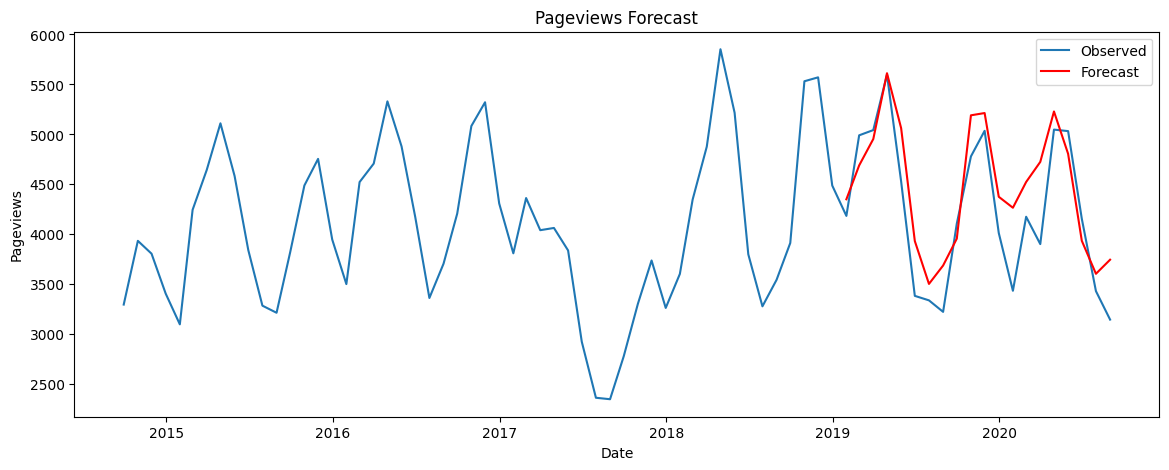

Mean Absolute Percentage Error (MAPE): 0.0876


In [192]:
# Train Model
p, d, q = 3, 0, 1
P, D, Q, s = 1, 0, 0, 12

model_SARIMA = SARIMAX(train_set, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model_SARIMA.fit()
print(model_fit.summary())

# Forecast future values
forecast_periods = 20  # Forecast the next 20 months
forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(14, 5))
plt.plot(df_monthly['Page.Loads'], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.title("Pageviews Forecast")
plt.xlabel("Date")
plt.ylabel("Pageviews")
plt.legend()
plt.show()

observed = df_monthly['Page.Loads'][-forecast_periods:]
mape = mean_absolute_percentage_error(observed, forecast_mean).round(4)
print('Mean Absolute Percentage Error (MAPE):', mape)

# 5. Deploy Model

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


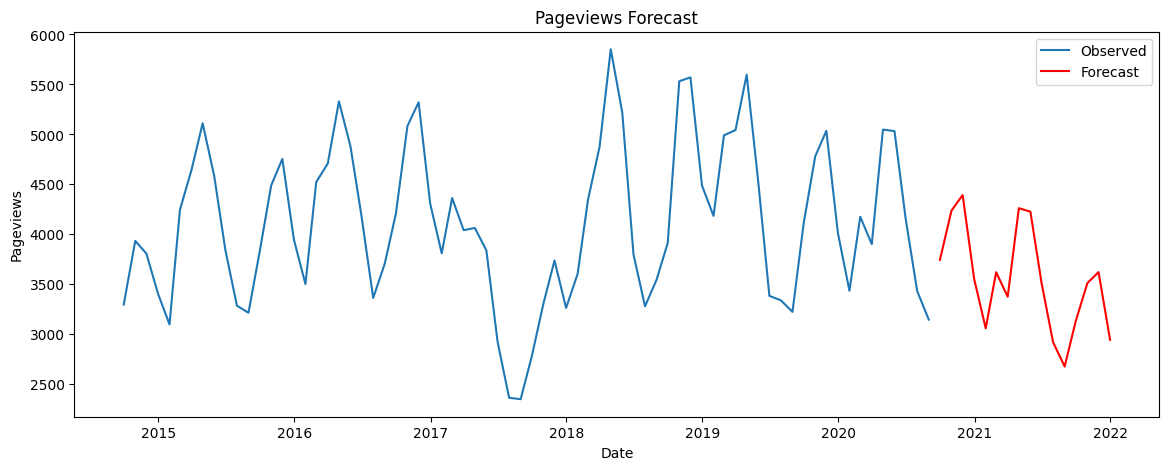

In [191]:
# Train Model
p, d, q = 3, 0, 1
P, D, Q, s = 1, 0, 0, 12
model_SARIMA = SARIMAX(df_monthly['Page.Loads'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model_SARIMA.fit()

# Forecast future values
forecast_periods = 16  # Forecast the next 16 months (09-2020 to 12-2021)
forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(14, 5))
plt.plot(df_monthly['Page.Loads'], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.title("Pageviews Forecast")
plt.xlabel("Date")
plt.ylabel("Pageviews")
plt.legend()
plt.show()